**Assignment 5: Knowledge & Reasoning (Given: 21 Mar 2023, Due: 9 Apr 2023)**


**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle on the due date. 
* Your code should be well commented and should be compatible with python3.
* For this assignment, you are allowed to import the libraries `pycosat`, `matplotlib`, `random` and `numpy` of python3. No other libraries may be imported.
* To start the jupyter notebook in the lab machine, enter
`source /opt/anaconda3/bin/activate base` (note the space after `source` and before `base`) in the terminal and then type `jupter notebook`
* Again, in the lab machines, if you are getting an error when importing `pycosat` saying that package is not installed, run `!pip3 install pycosat` in a jupyter notebook and install.

# Island of Knights and Knaves

Consider the island of Knights and Knaves where each inhabitant is either a knight or a knave. A knight always tells the truth: if knight states a sentence, then that sentence is true. A knave always lies: if a knave states a sentence, then that sentence is false. Now, given a set of statements mentioned by some inhabitants, the problem is to determine whether each of these inhabitants is a knight or a knave. This problem can be expressed as a Satisfiability problem of a Boolean formula. 

For example, consider the following statements by three people, 

 * A says either "I am a knight" or "I am a knave", but you don't know which.
 * B says "A said I am a knave"
 * B says "C is a knave"
 * C says "A is a knight"

We will now show how to solve this puzzle by expressing facts about the island and the statements made by the inhabitants as propositional statements in CNF (Conjunctive Normal Form) and solve for a satisfying assignment by calling a standard SAT solving algorithm. We will use the `pycosat` which is wrapper for *picosat* SAT solver written in C.

(a) For each person X introduce appropriate variables to capture whether X is a knight or a knave.  Using these variables, introduce appropriate propositional statements that (1) capture that each person is either a knight or a knave, and (2) exactly matches the statements that each of them makes about themselves or others. Write these statements as text (in [markdown](https://www.markdownguide.org/basic-syntax/)) in the cell below.

A_knight represents whether or not A is a Knight and A_knave represents whether or not A is a Knave.
Similarly B_knight and B_knave, C_knight and C_knave represent whether or not B and C are knights or knaves, respectively.

1) A_knight and not A_knave or A_knave and not A_knight, B_knight and not B_knave or B_knave and not B_knight,C_knight and not C_knave or C_knave and not C_knight represents A,B,C either being knights or knaves (but not both i.e., exclusive or).

2) The sentences can be written in propositional logic by replacing says with a biconditional implication for two cases of the speaker being a knight or a knave:
    X says str is equivalent to:
    (X_knight -> str) and (X_knave -> not str) and (str -> X_knight) and (not str -> X_knave)
   
    The sentences are:
    
    (A_knight -> (A_knight and not A_knave or A_knave and not A_knight)) and (A_knave -> not (A_knight and not A_knave or A_knave and not A_knight)) and ((A_knight and not A_knave or A_knave and not A_knight) -> A_knight) and (not (A_knight and not A_knave or A_knave and not A_knight) -> A_knave)
    
    this statement can be simplified into:
    (A_knight -> A_knight or A_knave) and (A_knave -> not (A_knight or A_knave)) and ((A_knight or A_knave) -> A_knight) and (not (A_knight or A_knave) -> A_knave)
    as the previous statement encodes the logic that one cannot be both a knight and a knave.
    
    (B_knight -> ((A_knight -> B_knave) and (A_knave -> not B_knave) and (B_knave -> A_knight) and (not B_knave -> A_knave))) and (B_knave -> not ((A_knight -> B_knave) and (A_knave -> not B_knave) and (B_knave -> A_knight) and (not B_knave -> A_knave))) and (((A_knight -> B_knave) and (A_knave -> not B_knave) and (B_knave -> A_knight) and (not B_knave -> A_knave)) -> B_knight) and (not ((A_knight -> B_knave) and (A_knave -> not B_knave) and (B_knave -> A_knight) and (not B_knave -> A_knave)) -> B_knave)
    
    (B_knight -> C_knave) and (B_knave -> not C_knave) and (C_knave -> B_knight) and (not C_knave -> B_knave)
    
    (C_knight -> A_knight) and (C_knave -> not A_knight) and (A_knight -> C_knight) and (not A_knight -> C_knave )

(b) Convert the above expressions to CNF formulas in the format used in `pycosat`.

In [2]:
#the variables A_knight=1,A_knave=2,B_knight=3,B_knave=4,C_knight=5
#and C_knave=6

cnf=[[1,-1],[1,2],[-1,-2],[2,-2],
    [3,-3],[3,4],[-3,-4],[4,-4],
    [5,-5],[5,6],[-5,-6],[6,-6],
     
#     [-2,1],
    [-1,-3,4],[-2,-3,-4],[1,2,4],[1,4,4],[2,-4,4],[4,-4,4],
    [-2,1,3,4],[1,-3,-4],[-1,-3,4],[2,-3,4],[-2,-3,-4],[2,-1,-3,-4],
    [-3,6],[-4,-6],[-6,3],[6,4],
    [-5,1],[-6,-1],[-1,5],[1,6]]

(c) Invoke the solver in `pycosat` and find who among A, B and C are knights and  knaves. 

In [3]:
import pycosat
for sol in pycosat.itersolve(cnf):
    if sol[0]==1:
        print("A is a knight, ",end='')
    else:
        print("A is a knave, ",end='')
    if sol[2]==3:
        print("B is a knight and ",end='')
    else:
        print("B is a knave and ",end='')
    if sol[4]==5:
        print("C is a knight is a solution")
    else:
        print("C is a knave is a solution")

A is a knight, B is a knave and C is a knight is a solution


(d) Repeat parts (a)-(c) for the following sets of statements. In these statements, there are only two inhabitants of the island.

i. A says "At least one of us is a knave" and B says nothing.

ii. A says "We are the same kind", B says "We are of different kinds"




Following the same convention as done previously but this time only for A and B
i.
1) A_knight and not A_knave or A_knave and not A_knight, B_knight and not B_knave or B_knave and not B_knight

2) (A_knight -> (A_knave or B_knave)) and (A_knave -> not (A_knave or B_knave)) and ((A_knave or B_knave) -> A_knight) and (not (A_knave or B_knave)-> A_knave)

ii. 
1) A_knight and not A_knave or A_knave and not A_knight, B_knight and not B_knave or B_knave and not B_knight

2) (A_knight -> (A_knight and B_knight or A_knave and B_knave)) and (A_knave -> not (A_knight and B_knight or A_knave and B_knave)) and ((A_knight and B_knight or A_knave and B_knave) -> A_knight) and (not (A_knight and B_knight or A_knave and B_knave) -> A_knave)

  (B_knight -> (A_knight and B_knave or A_knave and B_knight)) and (B_knave -> not (A_knight and B_knave or A_knave and B_knight)) and ((A_knight and B_knave or A_knave and B_knight) -> B_knight) and (not (A_knight and B_knave or A_knave and B_knight) -> B_knave)

In [11]:
#the variables A_knight=1,A_knave=2,B_knight=3 and B_knave=4
cnf1=[[1,-1],[1,2],[-1,-2],[2,-2],
    [3,-3],[3,4],[-3,-4],[4,-4],
    [-1,2,4],[-2,-2],[-2,-4],[1,-2],[1,-4],[2,4,2]]

for sol in pycosat.itersolve(cnf1):
    if sol[0]==1:
        print("A is a knight and ",end='')
    else:
        print("A is a knave and ",end='')
    if sol[2]==3:
        print("B is a knight is a solution ")
    else:
        print("B is a knave is a solution ")

A is a knight and B is a knave is a solution 


In [12]:
cnf2=[[1,-1],[1,2],[-1,-2],[2,-2],
      [3,-3],[3,4],[-3,-4],[4,-4],
      [1,2,4],[2,3],[-1,-2,-3],[-2,-4],
      [1,3,4],[2,4],[-1,-4],[-2,-3,-4]]

for sol in pycosat.itersolve(cnf2):
    if sol[0]==1:
        print("A is a knight and ",end='')
    else:
        print("A is a knave and ",end='')
    if sol[2]==3:
        print("B is a knight is a solution ")
    else:
        print("B is a knave is a solution ")

A is a knave and B is a knight is a solution 


# Binary Town 


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

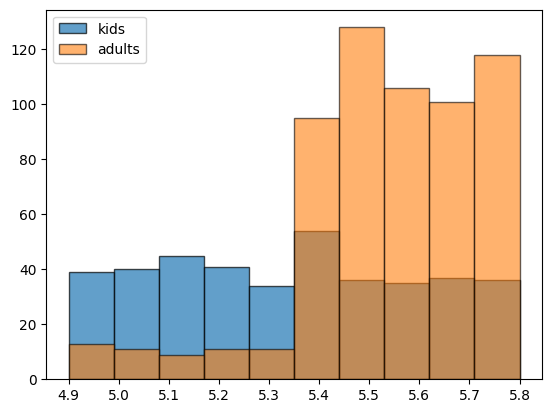

In [2]:
import random
from matplotlib import pyplot as plt
import numpy as np

ht_set=[4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]
p_ht_kid=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
p_ht_adult=[0.02,0.02,0.02,0.02,0.02,0.18,0.18,0.18,0.18,0.18]

p_kid=0.4
num_kids=0
num_adults=0

for i in range(1000):
    if random.random()<p_kid:
        num_kids+=1
    else:
        num_adults+=1

kids=np.array(random.choices(ht_set,p_ht_kid,k=num_kids))
adults=np.array(random.choices(ht_set,p_ht_adult,k=num_adults))

plt.hist(kids,label='kids',alpha=0.7,edgecolor='black')
plt.hist(adults,label='adults',alpha=0.6,edgecolor='black')
plt.legend()
plt.xticks(ht_set,ht_set)
plt.show()

(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [3]:
def classifier(sample,p_kid,ht_set,p_ht_kid,p_ht_adult):    #returns true if sample is classified as adult and false if classified as kid
    if (1-p_kid)*p_ht_adult[ht_set.index(sample)]/((1-p_kid)*p_ht_adult[ht_set.index(sample)]+p_kid*p_ht_kid[ht_set.index(sample)])>=0.5:
        return True
    else:
        return False

num_correct=0
for i in kids:
    if not classifier(i,p_kid,ht_set,p_ht_kid,p_ht_adult):
        num_correct+=1

for i in adults:
    if classifier(i,p_kid,ht_set,p_ht_kid,p_ht_adult):
        num_correct+=1

print(f"Accuracy of classifier is: {num_correct/1000}")

Accuracy of classifier is: 0.747


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

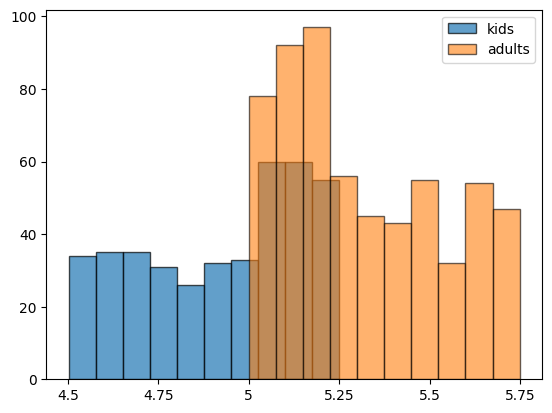

Accuracy of classifier is: 0.807


In [11]:
p_kid=0.4
kids=[]
adults=[]

for i in range(1000):
    if random.random()<p_kid:
        cdf=random.random()
        if cdf<0.5:
            kids.append(cdf+4.5)
        else:
            kids.append(cdf/2+4.75)
    else:
        cdf=random.random()
        if cdf<0.5:
            adults.append(cdf/2+5)
        else:
            adults.append(cdf+4.75)

kids=np.array(kids)
adults=np.array(adults)

plt.hist(kids,bins=20,label='kids',alpha=0.7,edgecolor='black')
plt.hist(adults,bins=20,label='adults',alpha=0.6,edgecolor='black')
plt.legend()
plt.xticks([4.5,4.75,5,5.25,5.5,5.75],[4.5,4.75,5,5.25,5.5,5.75])
plt.show()

def classifier2(sample,p_kid):    #returns true if sample is classified as adult and false if classified as kid
    if sample>=5 and sample<=5.25:
        f_adult=2
        f_kid=2
    elif sample>=5.25 and sample<=5.75:
        f_adult=1
        f_kid=0
    elif sample>=4.5 and sample<=5:
        f_kid=1
        f_adult=0
    else:
        f_kid=0
        f_adult=0
    if f_adult*(1-p_kid)/(f_adult*(1-p_kid)+p_kid*f_kid)>0.5:
        return True
    else:
        return False
    
num_correct=0
for i in kids:
    if not classifier2(i,p_kid):
        num_correct+=1

for i in adults:
    if classifier2(i,p_kid):
        num_correct+=1

print(f"Accuracy of classifier is: {num_correct/1000}")

(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





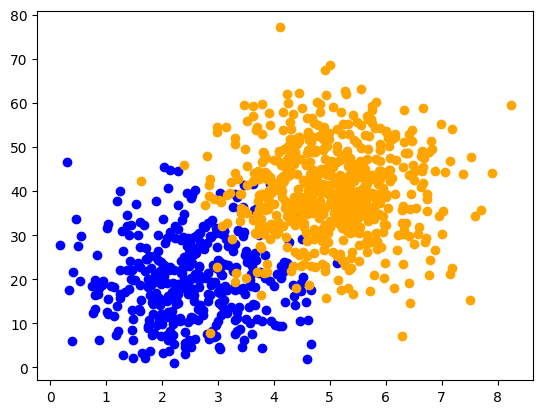

In [1]:
import random
from matplotlib import pyplot as plt
import numpy as np

p_kid=0.4
sigma11,sigma21,sigma12,sigma22=1,1,10,10
mu11,mu21,mu12,mu22=2.5,5,20,40

x_data_kids,x_data_adults=[],[]
y_data_adults,y_data_kids=[],[]

i=0
while(i<1000):
    if random.random()<p_kid:
        height=np.random.normal(mu11,sigma11)
        weight=np.random.normal(mu12,sigma12)
        if height<0 or weight<0:
            continue
        else:
            x_data_kids.append(height)
            y_data_kids.append(weight)
    else:
        height=np.random.normal(mu21,sigma21)
        weight=np.random.normal(mu22,sigma22)
        if height<0 or weight<0:
            continue
        else:
            x_data_adults.append(height)
            y_data_adults.append(weight)
    i+=1

plt.scatter(x_data_kids,y_data_kids,c="blue")
plt.scatter(x_data_adults,y_data_adults,c="orange")
plt.show()

(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

Enter a value for x8
Enter a value for y70


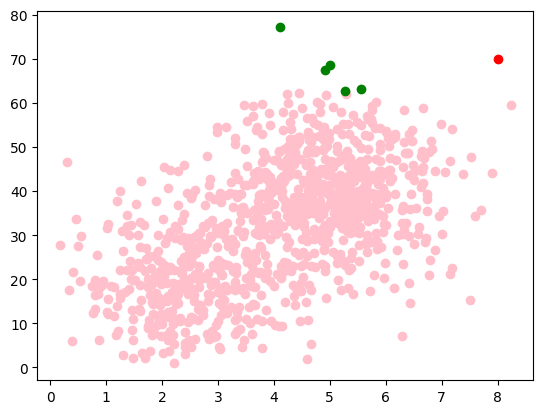

predicted to be an adult based on k=5


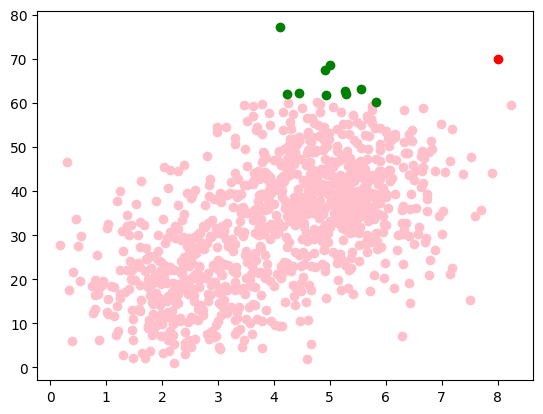

predicted to be an adult based on k=10


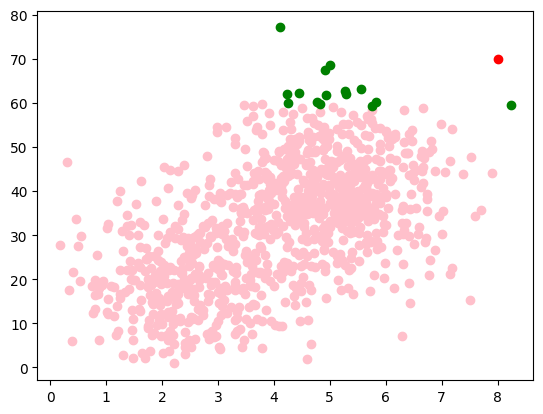

predicted to be an adult based on k=15


In [2]:
def knn(x,y,k,x_data_kids,x_data_adults,y_data_kids,y_data_adults): #returns a list of k tuples (xi,yi,distance,true/false) where third element represents whether or not the data represents an adult
    ret=[]
    for i in range(len(x_data_kids)):
        ret.append((x_data_kids[i],y_data_kids[i],(x-x_data_kids[i])**2+(y-y_data_kids[i])**2,False))
    for i in range(len(x_data_adults)):
        ret.append((x_data_adults[i],y_data_adults[i],(x-x_data_adults[i])**2+(y-y_data_adults[i])**2,True))

    ret.sort(key=lambda x:x[2])
    plt.scatter([i[0] for i in ret[k:]],[i[1] for i in ret[k:]],c="pink")
    plt.scatter([i[0] for i in ret[:k]],[i[1] for i in ret[:k]],c="green")
    plt.scatter(x,y,c="red")
    plt.show()
    return ret[:k]

def knn_classifier(x,y,k,x_data_kids,x_data_adults,y_data_kids,y_data_adults): #returns true if adult and false if child
    if k>len(x_data_adults)+len(x_data_kids):
        print("Error! K is too large for this data set")
        return
    num_adults=0
    for neighbours in knn(x,y,k,x_data_kids,x_data_adults,y_data_kids,y_data_adults):
        if neighbours[-1]:
            num_adults+=1
    if num_adults>k/2:
        return True
    return False

x=int(input("Enter a value for x"))
y=int(input("Enter a value for y"))
for k in [5,10,15]:
    if knn_classifier(x,y,k,x_data_kids,x_data_adults,y_data_kids,y_data_adults):
        print(f"predicted to be an adult based on k={k}")
    else:
        print(f"predicted to be a kid based on k={k}")


# Optimal First Batting Strategy 

Recall the cricket game simulation that we discussed in Assignment 2. Consider a one-day cricket match. Each
innings consists of 300 balls ignoring no balls, runouts and overthrows. At any point of time, treat the pair of batsmen playing as a single player. That is, there are 10 players, namely, $(1, 2),(2, 3), \ldots ,(10, 11)$. For every player, there are 5 possible shots: $A=\{1, 2, 3, 4, 6\}$. Each of these shots is associated with the risk of the player getting dismissed and this risk varies from player to player. The probabilities of getting dismissed for Player $(1, 2)$ is $pOutMin = [0.01, 0.02, 0.03, 0.1, 0.3]$ and for Player $(10, 11)$ is $pOutMax = [0.1, 0.2, 0.3, 0.5, 0.7]$,  where the ith entry is for the ith action. If there are $w$ wickets in hand, then use the formula 

$$pOut(a, w) = pOutMax(a) + (pOutMin(a) - pOutMax(a)) \times (w- 1)/9)$$ 

to calculate the probabilities of Player $(11-w, 11-w+1)$ getting dismissed for  where $w \in [10]$. Note that $pOut(a, 1)=pOutMin(a)$ and $pOut(a, 10)=pOutMax(a)$. You may assume that if the player does not get out, then the runs corresponding to the shot played is scored.



Let us formulate an optimal strategy for the team batting first. Let $b$ be the number of balls left and $w$ be the wickets in hand. Let $BestScore(b,w)$ be the
maximum expected score under an optimal policy in the remaining $b$ balls with $w$ wickets in hand. Note that no matter what the actual score is, the player should maximize the expected score in the remaining part of the game. Use the boundary conditions $BestScore(0,w)=0$ for each $w$ and $BestScore(b,0)=0$ for each $b$. 

Hint: For $b \in [300]$ and $w \in [10]$, $BestScore(b,w)=\max_a (a+BestScore(b-1,w))$ if the player does not get out in the $b$th ball and $BestScore(b,w)=\max_a BestScore(b-1,w-1)\}$ if the player gets out in the $b$th ball.






(a) Implement an optimal batting-first strategy by computing $BestScore(b,w)$ for each $b \in [300]$ and $w \in [10] \cup \{0\}$ using dynamic programming. Simulate 10 matches and bat according to the optimal policy. Output the optimal action (the recommended shot $BestShot(b,w)$) and the value (total expected score $BestScore(b,w)$ in the remainder of the game) for each pair $(b,w)$ where $b$ is the number of balls left and $w$ is the number of wickets left. Note that $BestShot(b,w)$ denotes the shot to be taken when there are $b$ balls and $w$ wickets left so that $BestScore(b,w)$ is attained. 



In [ ]:
import numpy as np
import random

actions=[1,2,3,4,6]
p_out=[0.1,0.2,0.3,0.5,0.7] 
p_out_diff=[0.01,0.02,0.03,0.4/9,0.4/9]

best_score=np.zeros((301,11))
best_shot=np.zeros((301,11))

for wicket in range(1,11):
    for ball in range(1,301):
        for i in range(5):
            expected_score=p_out[i]*best_score[ball-1][wicket-1]+(1-p_out[i])*(actions[i]+best_score[ball-1][wicket])
            if expected_score>best_score[ball][wicket]:
                best_score[ball][wicket]=expected_score
                best_shot[ball][wicket]=actions[i]
    for j in range(5):
        p_out[j]-=p_out_diff[j]
        
avg_runs=0
for i in range(10):
    p_out=[0.01,0.02,0.03,0.1,0.3]
    total_runs=0
    balls_left=300
    wickets_left=10
    while balls_left and wickets_left:
        if random.random()<p_out[actions.index(best_shot[balls_left][wickets_left])]:
            wickets_left-=1
            for j in range(5):
                p_out[j]+=p_out_diff[j]

        else:
            total_runs+=best_shot[balls_left][wickets_left]
        balls_left-=1    
    print(f"Total runs scored in simultion {i+1} is: {total_runs}")
    avg_runs+=total_runs

print(f"Average runs scored in 10 simulation: {avg_runs/10}")
        
for wicket in range(1,11):
    for ball in range(1,301):
        print(f" when {wicket} wickets and {ball} balls are remaining the best score (expected) is: {best_score[ball][wicket]} and best shot is: {best_shot[ball][wicket]}")

(b) What is your observation on the optimal strategy? Is it a good idea to bat slowly during the early part of the game, keeping wickets in hand? This usually allows a steady increase in the scoring rate, and often results in a last-minute orgy of runs and wickets during the final part of the innings. Or is it better to score quickly in the early part of the innings? How would the optimal strategy change if there is a chance that a player does not score the runs for a particular shot despite not getting dismissed. Taking $pRunMin = 0.5$, and $pRunMax = 0.8$,  when the player is not getting out, the probability of successfully obtaining the runs for that shot is given by $pRun(w) = pRunMin + (pRunMax - pRunMin) \times ((w - 1)/9).$

In [ ]:
import numpy as np
import random

actions=[1,2,3,4,6]
p_out=[0.1,0.2,0.3,0.5,0.7] 
p_out_diff=[0.01,0.02,0.03,0.4/9,0.4/9]
p_run=0.5
p_run_diff=1/30

best_score=np.zeros((301,11))
best_shot=np.zeros((301,11))

for wicket in range(1,11):
    for ball in range(1,301):
        for i in range(5):
            expected_score=p_out[i]*best_score[ball-1][wicket-1]+(1-p_out[i])*(p_run*actions[i]+best_score[ball-1][wicket])
            if expected_score>best_score[ball][wicket]:
                best_score[ball][wicket]=expected_score
                best_shot[ball][wicket]=actions[i]
    for j in range(5):
        p_out[j]-=p_out_diff[j]
    p_run+=p_run_diff
        
avg_runs=0
for i in range(10):
    p_out=[0.01,0.02,0.03,0.1,0.3]
    p_run=0.8
    total_runs=0
    balls_left=300
    wickets_left=10
    while balls_left and wickets_left:
        if random.random()<p_out[actions.index(best_shot[balls_left][wickets_left])]:
            wickets_left-=1
            for j in range(5):
                p_out[j]+=p_out_diff[j]
            p_run-=p_run_diff

        elif random.random()<p_run:
            total_runs+=best_shot[balls_left][wickets_left]
        balls_left-=1    
    print(f"Total runs scored in simultion {i+1} is: {total_runs}")
    avg_runs+=total_runs

print(f"Average runs scored in 10 simulation: {avg_runs/10}")
        
for wicket in range(1,11):
    for ball in range(1,301):
        print(f" when {wicket} wickets and {ball} balls are remaining the best score (expected) is: {best_score[ball][wicket]} and best shot is: {best_shot[ball][wicket]}")
